Блок 2 задания

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px
from datetime import datetime, timedelta
import json
import os
from dotenv import load_dotenv


%matplotlib inline
plt.style.use('seaborn-v0_8')
load_dotenv()


BASE_URL=os.getenv("API_URL")
START_DATE=os.getenv("DATE_BEGIN")
END_DATE=os.getenv("DATE_END")

In [2]:
def fetch_visits_data(START_DATE, END_DATE):
    """
    Получение данных о посещениях из API
    """
    url = f"{BASE_URL}/visits"
    params = {
        'begin': START_DATE,
        'end': END_DATE
    }
    
    print(f"Запрос посещений: {url}?begin={START_DATE}&end={END_DATE}")
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Проверка на ошибки HTTP
        
        data = response.json()
        print(f"Получено записей о посещениях: {len(data)}")
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных о посещениях: {e}")
        return None

def fetch_registrations_data(START_DATE, END_DATE):
    """
    Получение данных о регистрациях из API
    """
    url = f"{BASE_URL}/registrations"
    params = {
        'begin': START_DATE,
        'end': END_DATE
    }
    
    print(f"Запрос регистраций: {url}?begin={START_DATE}&end={END_DATE}")
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Проверка на ошибки HTTP
        
        data = response.json()
        print(f"Получено записей о регистрациях: {len(data)}")
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных о регистрациях: {e}")
        return None

In [3]:
# Получение данных из API
print("=== ЗАГРУЗКА ДАННЫХ О ПОСЕЩЕНИЯХ ===")
visits_data = fetch_visits_data(START_DATE, END_DATE)

print("\n=== ЗАГРУЗКА ДАННЫХ О РЕГИСТРАЦИЯХ ===")
registrations_data = fetch_registrations_data(START_DATE, END_DATE)

# Проверка успешности загрузки
if visits_data is None or registrations_data is None:
    print("Ошибка: Не удалось загрузить данные из API")
else:
    print(f"\nУспешно загружено:")
    print(f"- Посещений: {len(visits_data)} записей")
    print(f"- Регистраций: {len(registrations_data)} записей")

=== ЗАГРУЗКА ДАННЫХ О ПОСЕЩЕНИЯХ ===
Запрос посещений: https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01
Получено записей о посещениях: 263459

=== ЗАГРУЗКА ДАННЫХ О РЕГИСТРАЦИЯХ ===
Запрос регистраций: https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01
Получено записей о регистрациях: 21836

Успешно загружено:
- Посещений: 263459 записей
- Регистраций: 21836 записей


In [4]:
# Создание DataFrame из данных о посещениях
visits_df = None
registrations_df = None

if visits_data:
    visits_df = pd.DataFrame(visits_data)
    
    # Преобразование datetime в правильный формат
    visits_df['datetime'] = pd.to_datetime(visits_df['datetime'])
    
    # Переименование колонок для удобства
    visits_df = visits_df.rename(columns={
        'visit_id': 'uuid',
        'datetime': 'date'
    })
    
    print("=== ДАННЫЕ ПОСЕЩЕНИЙ ===")
    print(f"Размер: {visits_df.shape}")
    display(visits_df.head())
else:
    print("Нет данных о посещениях")

# Создание DataFrame из данных о регистрациях
if registrations_data:
    registrations_df = pd.DataFrame(registrations_data)
    
    # Преобразование datetime в правильный формат
    registrations_df['datetime'] = pd.to_datetime(registrations_df['datetime'])
    
    # Переименование колонок для удобства
    registrations_df = registrations_df.rename(columns={
        'datetime': 'date'
    })
    
    print("\n=== ДАННЫЕ РЕГИСТРАЦИЙ ===")
    print(f"Размер: {registrations_df.shape}")
    display(registrations_df.head())
else:
    print("Нет данных о регистрациях")

=== ДАННЫЕ ПОСЕЩЕНИЙ ===
Размер: (263459, 4)


,uuid,platform,user_agent,date
0,1e518204-6288-444f-8f7c-1c053aff78a3,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-08-29 10:16:00
1,1e518204-6288-444f-8f7c-1c053aff78a3,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-08-28 06:54:40
2,40fdd6fb-80a7-4e82-9f3f-d6a8571e831f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,2023-08-31 08:40:29
3,40fdd6fb-80a7-4e82-9f3f-d6a8571e831f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,2023-08-29 11:19:49
4,76aa7c26-084f-4a8c-9c08-d91dad72eb18,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-08-31 20:14:34



=== ДАННЫЕ РЕГИСТРАЦИЙ ===
Размер: (21836, 5)


,date,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple
3,2023-03-01 00:04:47,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60,halldavid@example.org,web,email
4,2023-03-01 18:31:52,27f875fc-f8ce-4aeb-8722-0ecb283d0760,denise86@example.net,web,google


In [5]:
# Анализ данных посещений
if visits_df is not None:
    print("=== АНАЛИЗ ДАННЫХ ПОСЕЩЕНИЙ ===")
    print("Основная информация:")
    visits_df.info()
    
    print("\nСтатистическое описание:")
    display(visits_df.describe(include='all'))
    
    print("\nРаспределение по платформам:")
    platform_visits = visits_df['platform'].value_counts()
    print(platform_visits)
    
    print(f"\nВременной диапазон: {visits_df['date'].min()} - {visits_df['date'].max()}")
else:
    print("Нет данных о посещениях для анализа")

=== АНАЛИЗ ДАННЫХ ПОСЕЩЕНИЙ ===
Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   uuid        263459 non-null  object        
 1   platform    263459 non-null  object        
 2   user_agent  263459 non-null  object        
 3   date        263459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 8.0+ MB

Статистическое описание:


,uuid,platform,user_agent,date
count,263459,263459,263459,263459
unique,146085,4,32,NaN
top,37b97ec1-0c3b-430c-8e8f-1613fea2b1fb,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,NaN
freq,4,236301,13623,NaN
mean,NaN,NaN,NaN,2023-06-01 06:22:22.042044160
min,NaN,NaN,NaN,2023-03-01 00:00:43
25%,NaN,NaN,NaN,2023-04-13 19:45:03
50%,NaN,NaN,NaN,2023-06-03 12:23:27
75%,NaN,NaN,NaN,2023-07-17 22:09:08
max,NaN,NaN,NaN,2023-08-31 23:52:57



Распределение по платформам:
platform
web        236301
android     13972
bot          7382
ios          5804
Name: count, dtype: int64

Временной диапазон: 2023-03-01 00:00:43 - 2023-08-31 23:52:57


In [6]:
# Анализ данных регистраций
if registrations_df is not None:
    print("\n" + "="*50)
    print("=== АНАЛИЗ ДАННЫХ РЕГИСТРАЦИЙ ===")
    print("Основная информация:")
    registrations_df.info()
    
    print("\nСтатистическое описание:")
    display(registrations_df.describe(include='all'))
    
    print("\nРаспределение по платформам:")
    platform_regs = registrations_df['platform'].value_counts()
    print(platform_regs)
    
    print("\nРаспределение по типам регистраций:")
    reg_types = registrations_df['registration_type'].value_counts()
    print(reg_types)
    
    print(f"\nВременной диапазон: {registrations_df['date'].min()} - {registrations_df['date'].max()}")
else:
    print("Нет данных о регистрациях для анализа")


=== АНАЛИЗ ДАННЫХ РЕГИСТРАЦИЙ ===
Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21836 non-null  datetime64[ns]
 1   user_id            21836 non-null  object        
 2   email              21836 non-null  object        
 3   platform           21836 non-null  object        
 4   registration_type  21836 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 853.1+ KB

Статистическое описание:


,date,user_id,email,platform,registration_type
count,21836,21836,21836,21836,21836
unique,NaN,21836,20868,3,4
top,NaN,fe03e08a-8e86-4b5f-9a50-c18a02b0d234,ujones@example.com,android,email
freq,NaN,1,6,10582,8996
mean,2023-05-29 10:17:02.002747904,NaN,NaN,NaN,NaN
min,2023-03-01 00:04:47,NaN,NaN,NaN,NaN
25%,2023-04-12 01:49:47.500000,NaN,NaN,NaN,NaN
50%,2023-05-26 13:22:09,NaN,NaN,NaN,NaN
75%,2023-07-15 17:26:30.500000,NaN,NaN,NaN,NaN
max,2023-08-31 23:43:26,NaN,NaN,NaN,NaN



Распределение по платформам:
platform
android    10582
web         6877
ios         4377
Name: count, dtype: int64

Распределение по типам регистраций:
registration_type
email     8996
google    7105
apple     4006
yandex    1729
Name: count, dtype: int64

Временной диапазон: 2023-03-01 00:04:47 - 2023-08-31 23:43:26


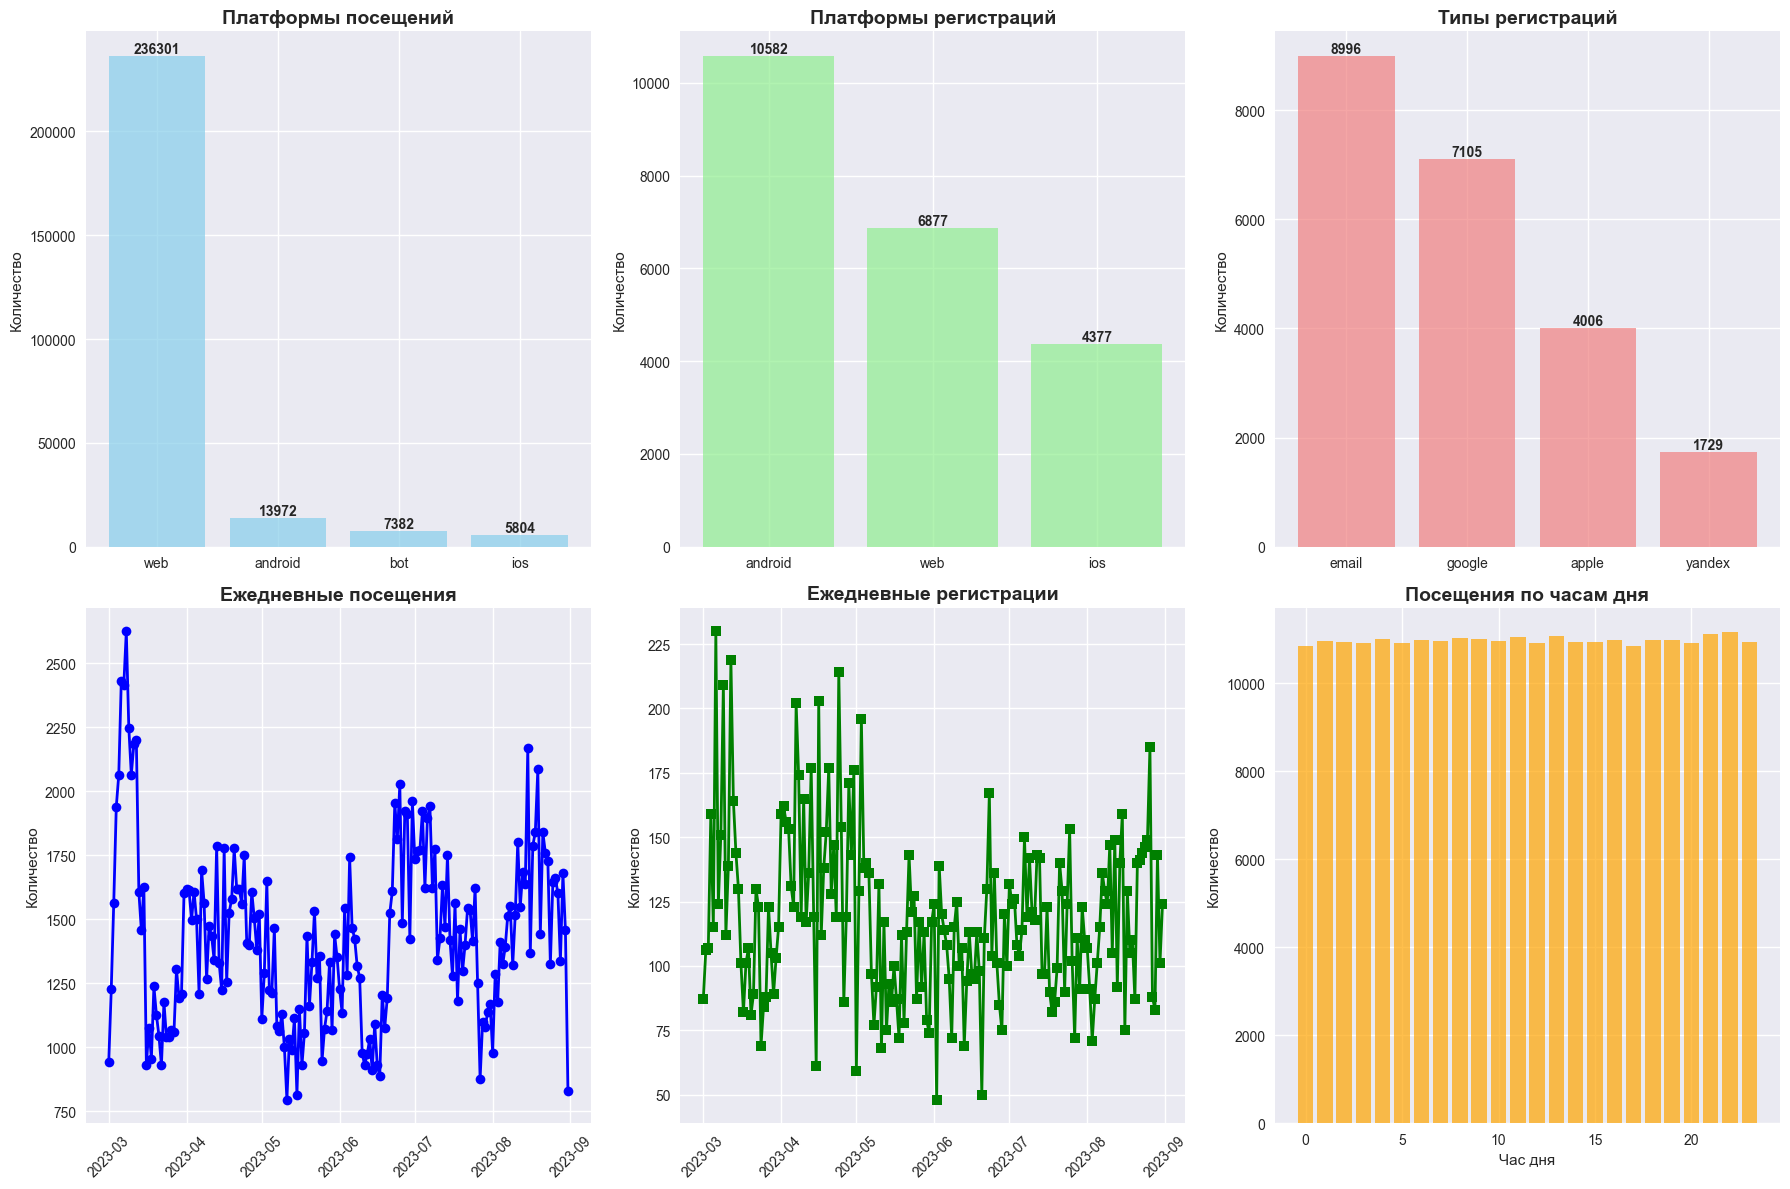

In [7]:
# Визуализация данных
if visits_df is not None and registrations_df is not None:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Распределение платформ для посещений
    platform_visits = visits_df['platform'].value_counts()
    axes[0, 0].bar(platform_visits.index, platform_visits.values, color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Платформы посещений', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Количество')
    for i, v in enumerate(platform_visits.values):
        axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 2. Распределение платформ для регистраций
    platform_regs = registrations_df['platform'].value_counts()
    axes[0, 1].bar(platform_regs.index, platform_regs.values, color='lightgreen', alpha=0.7)
    axes[0, 1].set_title('Платформы регистраций', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Количество')
    for i, v in enumerate(platform_regs.values):
        axes[0, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 3. Типы регистраций
    reg_types = registrations_df['registration_type'].value_counts()
    axes[0, 2].bar(reg_types.index, reg_types.values, color='lightcoral', alpha=0.7)
    axes[0, 2].set_title('Типы регистраций', fontsize=14, fontweight='bold')
    axes[0, 2].set_ylabel('Количество')
    for i, v in enumerate(reg_types.values):
        axes[0, 2].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 4. Ежедневные посещения
    visits_df['date_only'] = visits_df['date'].dt.date
    daily_visits = visits_df['date_only'].value_counts().sort_index()
    axes[1, 0].plot(daily_visits.index, daily_visits.values, color='blue', linewidth=2, marker='o')
    axes[1, 0].set_title('Ежедневные посещения', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Количество')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Ежедневные регистрации
    registrations_df['date_only'] = registrations_df['date'].dt.date
    daily_regs = registrations_df['date_only'].value_counts().sort_index()
    axes[1, 1].plot(daily_regs.index, daily_regs.values, color='green', linewidth=2, marker='s')
    axes[1, 1].set_title('Ежедневные регистрации', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Количество')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # 6. Распределение по часам (посещения)
    visits_df['hour'] = visits_df['date'].dt.hour
    hourly_visits = visits_df['hour'].value_counts().sort_index()
    axes[1, 2].bar(hourly_visits.index, hourly_visits.values, color='orange', alpha=0.7)
    axes[1, 2].set_title('Посещения по часам дня', fontsize=14, fontweight='bold')
    axes[1, 2].set_xlabel('Час дня')
    axes[1, 2].set_ylabel('Количество')
    
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для визуализации")

In [8]:
# Сохранение данных и создание сводки
if visits_df is not None:
    visits_df.to_csv(f'visits_api_{START_DATE}_to_{END_DATE}.csv', index=False)
    print(f"Данные о посещениях сохранены в: visits_api_{START_DATE}_to_{END_DATE}.csv")

if registrations_df is not None:
    registrations_df.to_csv(f'registrations_api_{START_DATE}_to_{END_DATE}.csv', index=False)
    print(f"Данные о регистрациях сохранены в: registrations_api_{START_DATE}_to_{END_DATE}.csv")

# Создание сводки анализа
if visits_df is not None and registrations_df is not None:
    summary = {
        'Метрика': [
            'Период анализа',
            'Всего посещений',
            'Уникальных посетителей',
            'Всего регистраций',
            'Уникальных пользователей',
            'Конверсия (регистрации/посещения)',
            'Самая популярная платформа посещений',
            'Самая популярная платформа регистраций',
            'Самый популярный тип регистрации'
        ],
        'Значение': [
            f"{START_DATE} - {END_DATE}",
            len(visits_df),
            visits_df['uuid'].nunique(),
            len(registrations_df),
            registrations_df['user_id'].nunique(),
            f"{(len(registrations_df) / len(visits_df) * 100):.2f}%",
            visits_df['platform'].value_counts().index[0],
            registrations_df['platform'].value_counts().index[0],
            registrations_df['registration_type'].value_counts().index[0]
        ]
    }
    
    summary_df = pd.DataFrame(summary)
    print("\n=== СВОДКА АНАЛИЗА ===")
    display(summary_df)
    
    # Сохранение сводки
    summary_df.to_csv('api_analysis_summary.csv', index=False)
    print("Сводка анализа сохранена в: api_analysis_summary.csv")

print("\n" + "="*60)
print("АНАЛИЗ ДАННЫХ ИЗ API ЗАВЕРШЕН!")
print("="*60)

Данные о посещениях сохранены в: visits_api_2023-03-01_to_2023-09-01.csv
Данные о регистрациях сохранены в: registrations_api_2023-03-01_to_2023-09-01.csv

=== СВОДКА АНАЛИЗА ===


,Метрика,Значение
0,Период анализа,2023-03-01 - 2023-09-01
1,Всего посещений,263459
2,Уникальных посетителей,146085
3,Всего регистраций,21836
4,Уникальных пользователей,21836
5,Конверсия (регистрации/посещения),8.29%
6,Самая популярная платформа посещений,web
7,Самая популярная платформа регистраций,android
8,Самый популярный тип регистрации,email


Сводка анализа сохранена в: api_analysis_summary.csv

АНАЛИЗ ДАННЫХ ИЗ API ЗАВЕРШЕН!


Блок 3 задания

In [9]:
# Создаем копии данных для работы
visits_clean = visits_df.copy()
registrations_clean = registrations_df.copy()

# Фильтруем ботов из данных о посещениях
print("Фильтрация ботов...")
print(f"Всего визитов до фильтрации: {len(visits_clean)}")

# Ищем ботов по user_agent
bot_keywords = ['bot', 'crawler', 'spider', 'scan']
visits_clean = visits_clean[~visits_clean['user_agent'].str.lower().str.contains('|'.join(bot_keywords), na=False)]

print(f"Визитов после фильтрации ботов: {len(visits_clean)}")
print(f"Отфильтровано ботов: {len(visits_df) - len(visits_clean)}")

# Оставляем только последний визит для каждого visit_id
print("\nОставляем только последние визиты для каждого пользователя...")
visits_clean = visits_clean.sort_values('date').groupby('uuid').last().reset_index()
print(f"Уникальных визитов: {len(visits_clean)}")

Фильтрация ботов...
Всего визитов до фильтрации: 263459
Визитов после фильтрации ботов: 256077
Отфильтровано ботов: 7382

Оставляем только последние визиты для каждого пользователя...
Уникальных визитов: 138703


In [10]:
# Агрегация визитов по дате и платформе
print("Агрегация визитов по дате и платформе...")
visits_clean['date_group'] = visits_clean['date'].dt.date
visits_grouped = visits_clean.groupby(['date_group', 'platform']).agg(
    visits=('uuid', 'count')
).reset_index()

print(f"Групп визитов: {len(visits_grouped)}")
display(visits_grouped.head())

# Агрегация регистраций по дате и платформе
print("Агрегация регистраций по дате и платформе...")
registrations_clean['date_group'] = registrations_clean['date'].dt.date
registrations_grouped = registrations_clean.groupby(['date_group', 'platform']).agg(
    registrations=('user_id', 'count')
).reset_index()

print(f"Групп регистраций: {len(registrations_grouped)}")
display(registrations_grouped.head())

Агрегация визитов по дате и платформе...
Групп визитов: 552


,date_group,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,279
3,2023-03-02,android,67
4,2023-03-02,ios,31


Агрегация регистраций по дате и платформе...
Групп регистраций: 552


,date_group,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24


In [11]:
# Объединяем данные о визитах и регистрациях
print("Объединение данных...")
conversion_df = pd.merge(
    visits_grouped,
    registrations_grouped,
    on=['date_group', 'platform'],
    how='left'  # left join чтобы сохранить все визиты
)

# Заполняем пропущенные значения в регистрациях нулями
conversion_df['registrations'] = conversion_df['registrations'].fillna(0).astype(int)

# Рассчитываем конверсию
conversion_df['conversion'] = (conversion_df['registrations'] / conversion_df['visits'] * 100).round(10)

# Сортируем по дате и платформе
conversion_df = conversion_df.sort_values(['date_group', 'platform']).reset_index(drop=True)

print("Итоговый датафрейм конверсии:")
print(f"Размер: {conversion_df.shape}")
display(conversion_df.head(10))

Объединение данных...
Итоговый датафрейм конверсии:
Размер: (552, 5)


,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,279,8,2.867384
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355
5,2023-03-02,web,515,23,4.466019
6,2023-03-03,android,26,22,84.615385
7,2023-03-03,ios,40,34,85.000000
8,2023-03-03,web,617,51,8.265802
9,2023-03-04,android,94,77,81.914894


In [12]:
# Проверяем итоговые метрики
print("=== СВОДКА КОНВЕРСИИ ===")
print(f"Общий период: {conversion_df['date_group'].min()} - {conversion_df['date_group'].max()}")
print(f"Всего дней с данными: {conversion_df['date_group'].nunique()}")
print(f"Всего записей: {len(conversion_df)}")

print("\nКонверсия по платформам:")
platform_conversion = conversion_df.groupby('platform').agg({
    'visits': 'sum',
    'registrations': 'sum',
    'conversion': 'mean'
}).round(2)
display(platform_conversion)

print("\nОбщая конверсия:")
total_visits = conversion_df['visits'].sum()
total_regs = conversion_df['registrations'].sum()
total_conversion = (total_regs / total_visits * 100).round(2)
print(f"Всего визитов: {total_visits}")
print(f"Всего регистраций: {total_regs}")
print(f"Общая конверсия: {total_conversion}%")

=== СВОДКА КОНВЕРСИИ ===
Общий период: 2023-03-01 - 2023-08-31
Всего дней с данными: 184
Всего записей: 552

Конверсия по платформам:


,visits,registrations,conversion
platform,,,
android,13972,10582,76.80
ios,5804,4377,75.88
web,118927,6877,5.82



Общая конверсия:
Всего визитов: 138703
Всего регистраций: 21836
Общая конверсия: 15.74%


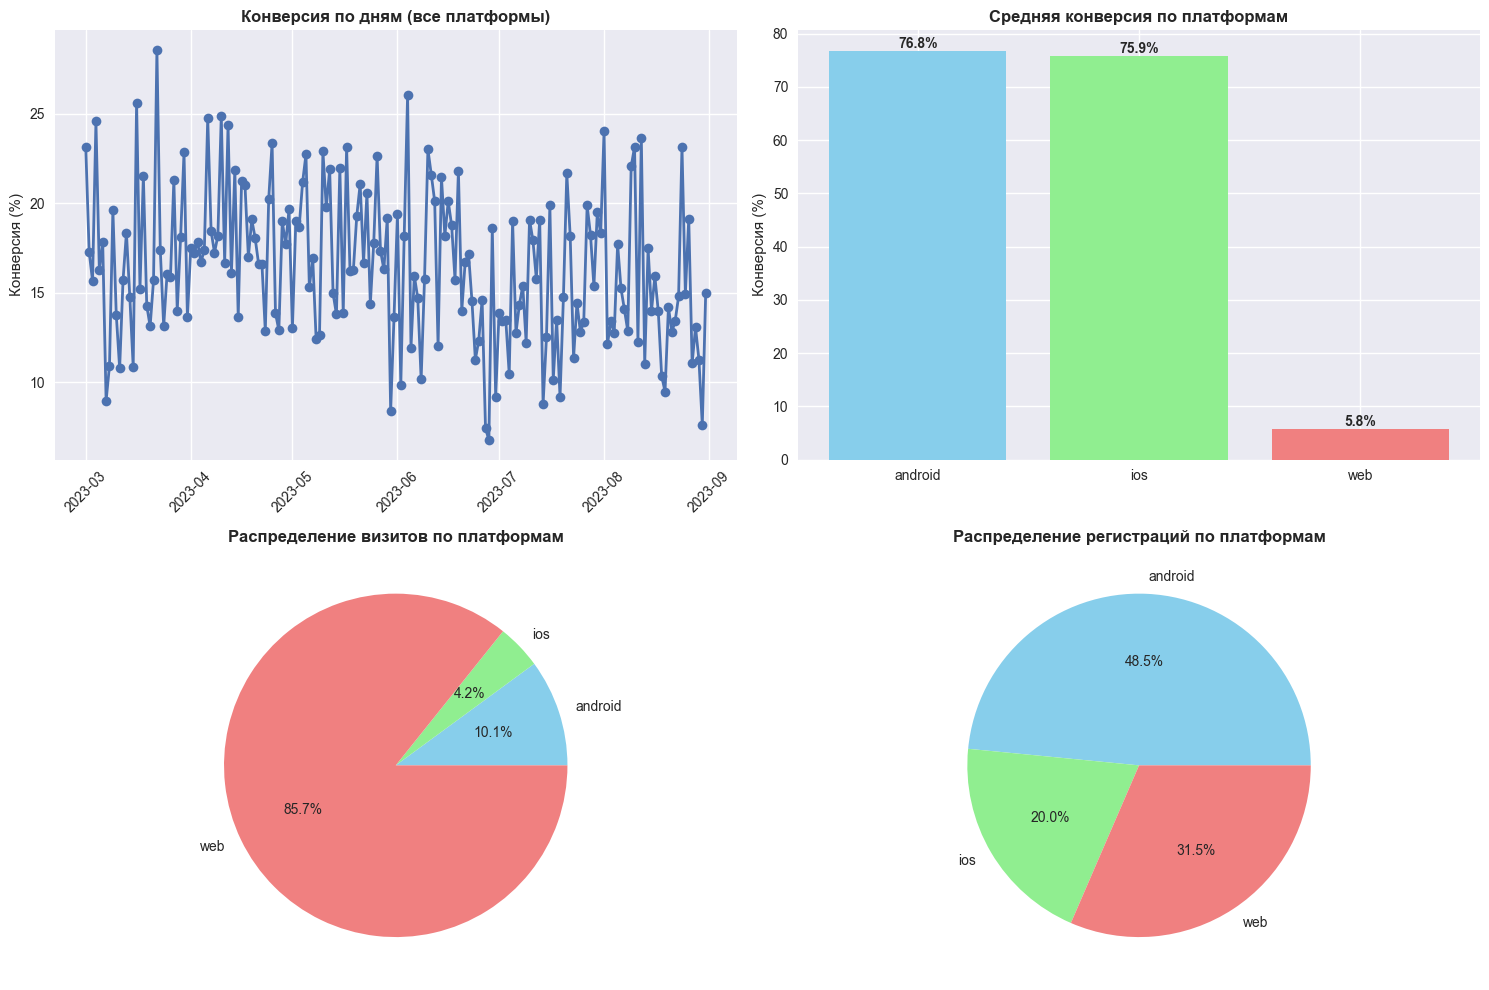

In [13]:
# Визуализация конверсии по времени
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Конверсия по дням (все платформы)
daily_conversion = conversion_df.groupby('date_group').agg({
    'visits': 'sum',
    'registrations': 'sum'
})
daily_conversion['conversion'] = (daily_conversion['registrations'] / daily_conversion['visits'] * 100).round(2)

axes[0, 0].plot(daily_conversion.index, daily_conversion['conversion'], marker='o', linewidth=2)
axes[0, 0].set_title('Конверсия по дням (все платформы)', fontweight='bold')
axes[0, 0].set_ylabel('Конверсия (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Конверсия по платформам (средняя)
platform_avg = conversion_df.groupby('platform')['conversion'].mean().sort_values(ascending=False)
axes[0, 1].bar(platform_avg.index, platform_avg.values, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Средняя конверсия по платформам', fontweight='bold')
axes[0, 1].set_ylabel('Конверсия (%)')
for i, v in enumerate(platform_avg.values):
    axes[0, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Распределение визитов по платформам
platform_visits = conversion_df.groupby('platform')['visits'].sum()
axes[1, 0].pie(platform_visits.values, labels=platform_visits.index, autopct='%1.1f%%', 
               colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[1, 0].set_title('Распределение визитов по платформам', fontweight='bold')

# 4. Распределение регистраций по платформам
platform_regs = conversion_df.groupby('platform')['registrations'].sum()
axes[1, 1].pie(platform_regs.values, labels=platform_regs.index, autopct='%1.1f%%',
               colors=['skyblue', 'lightgreen', 'lightcoral'])
axes[1, 1].set_title('Распределение регистраций по платформам', fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
# Сохраняем датафрейм в JSON
print("Сохранение данных в JSON...")
conversion_df.to_json('conversion.json', orient='columns', date_format='epoch')

# Проверяем сохраненный файл
import os
if os.path.exists('conversion.json'):
    file_size = os.path.getsize('conversion.json')
    print(f"Файл conversion.json успешно сохранен! Размер: {file_size} байт")
    
    # Читаем и показываем часть сохраненных данных для проверки
    with open('conversion.json', 'r') as f:
        sample_data = f.read()[:500]  # Первые 500 символов
    print("\nПример сохраненных данных:")
    print(sample_data)
    print("...")
else:
    print("Ошибка: файл не был сохранен")

Сохранение данных в JSON...
Файл conversion.json успешно сохранен! Размер: 36416 байт

Пример сохраненных данных:
{"date_group":{"0":1677628800000,"1":1677628800000,"2":1677628800000,"3":1677715200000,"4":1677715200000,"5":1677715200000,"6":1677801600000,"7":1677801600000,"8":1677801600000,"9":1677888000000,"10":1677888000000,"11":1677888000000,"12":1677974400000,"13":1677974400000,"14":1677974400000,"15":1678060800000,"16":1678060800000,"17":1678060800000,"18":1678147200000,"19":1678147200000,"20":1678147200000,"21":1678233600000,"22":1678233600000,"23":1678233600000,"24":1678320000000,"25":1678320000000,"
...


In [ ]:
# Проверяем структуру итогового датафрейма
print("=== ПРОВЕРКА СТРУКТУРЫ ДАННЫХ ===")
print("Колонки датафрейма:")
print(conversion_df.columns.tolist())
print(f"\nТипы данных:")
print(conversion_df.dtypes)
print(f"\nРазмер: {conversion_df.shape}")

print("\nПроверка пропущенных значений:")
print(conversion_df.isnull().sum())

print("\nПервые 10 строк итогового датафрейма:")
display(conversion_df.head(10))

print("\nСтатистика конверсии:")
print(f"Минимальная конверсия: {conversion_df['conversion'].min():.2f}%")
print(f"Максимальная конверсия: {conversion_df['conversion'].max():.2f}%")
print(f"Средняя конверсия: {conversion_df['conversion'].mean():.2f}%")
print(f"Медианная конверсия: {conversion_df['conversion'].median():.2f}%")

4 блок

In [17]:
# Загрузка данных о рекламных кампаниях
print("Загрузка данных о рекламных кампаниях...")
ads_df = pd.read_csv('ads.csv')

print("=== ДАННЫЕ РЕКЛАМНЫХ КАМПАНИЙ ===")
print(f"Размер данных: {ads_df.shape}")
print("\nПервые 5 строк:")
display(ads_df.head())

print("\nИнформация о данных:")
ads_df.info()

print("\nПроверка пропущенных значений:")
print(ads_df.isnull().sum())

print("\nСтатистическое описание:")
display(ads_df.describe(include='all'))

Загрузка данных о рекламных кампаниях...
=== ДАННЫЕ РЕКЛАМНЫХ КАМПАНИЙ ===
Размер данных: (159, 5)

Первые 5 строк:


,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T10:54:41,google,cpc,advanced_algorithms_series,212
1,2023-03-02T10:32:35,google,cpc,advanced_algorithms_series,252
2,2023-03-03T19:21:40,google,cpc,advanced_algorithms_series,202
3,2023-03-04T17:52:04,google,cpc,advanced_algorithms_series,223
4,2023-03-05T05:35:13,google,cpc,advanced_algorithms_series,265



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          159 non-null    object
 1   utm_source    159 non-null    object
 2   utm_medium    159 non-null    object
 3   utm_campaign  159 non-null    object
 4   cost          159 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB

Проверка пропущенных значений:
date            0
utm_source      0
utm_medium      0
utm_campaign    0
cost            0
dtype: int64

Статистическое описание:


,date,utm_source,utm_medium,utm_campaign,cost
count,159,159,159,159,159.000000
unique,159,3,2,5,NaN
top,2023-03-01T10:54:41,google,cpc,virtual_reality_workshop,NaN
freq,1,73,116,43,NaN
mean,NaN,NaN,NaN,NaN,194.836478
std,NaN,NaN,NaN,NaN,60.272154
min,NaN,NaN,NaN,NaN,100.000000
25%,NaN,NaN,NaN,NaN,143.000000
50%,NaN,NaN,NaN,NaN,190.000000
75%,NaN,NaN,NaN,NaN,252.000000


In [ ]:
# Преобразование даты в правильный формат
print("Преобразование дат...")
ads_df['date'] = pd.to_datetime(ads_df['date'])
ads_df['date_group'] = ads_df['date'].dt.date

print(f"Период рекламных кампаний: {ads_df['date_group'].min()} - {ads_df['date_group'].max()}")

# Анализ рекламных кампаний
print("\nРаспределение по UTM источникам:")
print(ads_df['utm_source'].value_counts())

print("\nРаспределение по UTM медиумам:")
print(ads_df['utm_medium'].value_counts())

print("\nРаспределение по названиям кампаний:")
print(ads_df['utm_campaign'].value_counts())

print(f"\nВсего уникальных кампаний: {ads_df['utm_campaign'].nunique()}")
print(f"Общие затраты на рекламу: {ads_df['cost'].sum():.2f} руб.")

In [ ]:
# Агрегация рекламных данных по дате
print("Агрегация рекламных данных по датам...")

# Группируем по дате и кампании, суммируя затраты
ads_grouped = ads_df.groupby(['date_group', 'utm_campaign']).agg({
    'cost': 'sum',
    'utm_source': 'first',  # берем первый источник для кампании в этот день
    'utm_medium': 'first'   # берем первый медиум для кампании в этот день
}).reset_index()

print(f"Групп рекламных данных: {len(ads_grouped)}")
display(ads_grouped.head(10))

In [ ]:
# Агрегация визитов и регистраций по датам (без разбивки по платформам)
print("Агрегация визитов и регистраций по датам...")

# Суммируем визиты и регистрации по датам
daily_metrics = conversion_df.groupby('date_group').agg({
    'visits': 'sum',
    'registrations': 'sum'
}).reset_index()

print(f"Дней с данными: {len(daily_metrics)}")
display(daily_metrics.head(10))

In [ ]:
# Объединяем данные о метриках и рекламе
print("Объединение данных о конверсии и рекламе...")

# Используем left join, чтобы сохранить все дни с метриками
ads_conversion_df = pd.merge(
    daily_metrics,
    ads_grouped,
    on='date_group',
    how='left'
)

# Заполняем пропущенные значения
ads_conversion_df['cost'] = ads_conversion_df['cost'].fillna(0)
ads_conversion_df['utm_campaign'] = ads_conversion_df['utm_campaign'].fillna('none')
ads_conversion_df['utm_source'] = ads_conversion_df['utm_source'].fillna('none')
ads_conversion_df['utm_medium'] = ads_conversion_df['utm_medium'].fillna('none')

# Сортируем по дате
ads_conversion_df = ads_conversion_df.sort_values('date_group').reset_index(drop=True)

print("Итоговый датафрейм:")
print(f"Размер: {ads_conversion_df.shape}")
display(ads_conversion_df.head(15))

In [ ]:
# Анализ результатов объединения
print("=== АНАЛИЗ ОБЪЕДИНЕННЫХ ДАННЫХ ===")

# Дни с рекламой и без
days_with_ads = ads_conversion_df[ads_conversion_df['utm_campaign'] != 'none']
days_without_ads = ads_conversion_df[ads_conversion_df['utm_campaign'] == 'none']

print(f"Всего дней в данных: {len(ads_conversion_df)}")
print(f"Дней с рекламными кампаниями: {len(days_with_ads)}")
print(f"Дней без рекламных кампаний: {len(days_without_ads)}")

print(f"\nОбщие затраты на рекламу: {ads_conversion_df['cost'].sum():.2f} руб.")
print(f"Средние затраты в день с рекламой: {days_with_ads['cost'].mean():.2f} руб.")

# Анализ эффективности рекламы
if not days_with_ads.empty:
    print("\n=== ЭФФЕКТИВНОСТЬ РЕКЛАМНЫХ КАМПАНИЙ ===")
    
    # Конверсия в дни с рекламой и без
    conversion_with_ads = (days_with_ads['registrations'].sum() / days_with_ads['visits'].sum() * 100).round(2)
    conversion_without_ads = (days_without_ads['registrations'].sum() / days_without_ads['visits'].sum() * 100).round(2)
    
    print(f"Конверсия в дни с рекламой: {conversion_with_ads}%")
    print(f"Конверсия в дни без рекламы: {conversion_without_ads}%")
    
    # Эффективность по кампаниям
    campaign_performance = days_with_ads.groupby('utm_campaign').agg({
        'cost': 'sum',
        'visits': 'sum',
        'registrations': 'sum',
        'date_group': 'count'
    }).rename(columns={'date_group': 'days'})
    
    campaign_performance['conversion'] = (campaign_performance['registrations'] / campaign_performance['visits'] * 100).round(2)
    campaign_performance['cpa'] = (campaign_performance['cost'] / campaign_performance['registrations']).round(2)
    
    print("\nЭффективность по кампаниям:")
    display(campaign_performance)

In [ ]:
# Визуализация данных о рекламе и конверсии
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Затраты на рекламу по времени
ads_dates = ads_conversion_df[ads_conversion_df['cost'] > 0]
if not ads_dates.empty:
    axes[0, 0].bar(ads_dates['date_group'], ads_dates['cost'], color='orange', alpha=0.7)
    axes[0, 0].set_title('Затраты на рекламу по дням', fontweight='bold')
    axes[0, 0].set_ylabel('Затраты (руб.)')
    axes[0, 0].tick_params(axis='x', rotation=45)
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о затратах', ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Распределение затрат по кампаниям
if not ads_dates.empty:
    campaign_costs = ads_dates.groupby('utm_campaign')['cost'].sum().sort_values(ascending=False)
    axes[0, 1].bar(range(len(campaign_costs)), campaign_costs.values, color='lightblue', alpha=0.7)
    axes[0, 1].set_title('Затраты по рекламным кампаниям', fontweight='bold')
    axes[0, 1].set_ylabel('Затраты (руб.)')
    axes[0, 1].set_xticks(range(len(campaign_costs)))
    axes[0, 1].set_xticklabels(campaign_costs.index, rotation=45, ha='right')

# 3. Сравнение конверсии с рекламой и без
conversion_comparison = pd.DataFrame({
    'С рекламой': [conversion_with_ads],
    'Без рекламы': [conversion_without_ads]
})
axes[1, 0].bar(conversion_comparison.columns, conversion_comparison.iloc[0].values, 
               color=['lightgreen', 'lightcoral'], alpha=0.7)
axes[1, 0].set_title('Сравнение конверсии', fontweight='bold')
axes[1, 0].set_ylabel('Конверсия (%)')
for i, v in enumerate(conversion_comparison.iloc[0].values):
    axes[1, 0].text(i, v, f'{v}%', ha='center', va='bottom', fontweight='bold')

# 4. Визиты и регистрации по дням (с выделением рекламных дней)
axes[1, 1].plot(ads_conversion_df['date_group'], ads_conversion_df['visits'], 
                label='Визиты', marker='o', linewidth=2)
axes[1, 1].plot(ads_conversion_df['date_group'], ads_conversion_df['registrations'], 
                label='Регистрации', marker='s', linewidth=2)

# Выделяем дни с рекламой
ad_days = ads_conversion_df[ads_conversion_df['cost'] > 0]['date_group']
for ad_day in ad_days:
    axes[1, 1].axvline(x=ad_day, color='red', alpha=0.3, linestyle='--')

axes[1, 1].set_title('Визиты и регистрации (красные линии - дни с рекламой)', fontweight='bold')
axes[1, 1].set_ylabel('Количество')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Оставляем только необходимые колонки
print("Финальная подготовка датафрейма...")
final_ads_df = ads_conversion_df[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]

# Проверяем структуру
print("Структура финального датафрейма:")
print(final_ads_df.info())
print(f"\nРазмер: {final_ads_df.shape}")

print("\nПервые 15 строк финального датафрейма:")
display(final_ads_df.head(15))

# Проверяем дни с рекламой
print(f"\nДней с рекламой: {len(final_ads_df[final_ads_df['cost'] > 0])}")
print(f"Дней без рекламы: {len(final_ads_df[final_ads_df['cost'] == 0])}")
print(f"Общие затраты: {final_ads_df['cost'].sum():.2f} руб.")

In [ ]:
# Сохраняем датафрейм в JSON
print("Сохранение данных в JSON...")
final_ads_df.to_json('ads.json', orient='columns', date_format='epoch')

# Проверяем сохраненный файл
import os
import json

if os.path.exists('ads.json'):
    file_size = os.path.getsize('ads.json')
    print(f"Файл ads.json успешно сохранен! Размер: {file_size} байт")
    
    # Читаем и показываем часть сохраненных данных для проверки
    with open('ads.json', 'r') as f:
        saved_data = json.load(f)
    
    print("\nСтруктура сохраненного JSON:")
    for key in saved_data.keys():
        print(f"{key}: {len(saved_data[key])} записей")
    
    print("\nПример сохраненных данных (первые 5 записей):")
    sample_data = {key: list(value.items())[:5] for key, value in saved_data.items()}
    print(json.dumps(sample_data, indent=2, ensure_ascii=False))
else:
    print("Ошибка: файл не был сохранен")

In [ ]:
# Создаем итоговый отчет
print("="*60)
print("ОБЪЕДИНЕНИЕ ДАННЫХ С РЕКЛАМОЙ ЗАВЕРШЕНО!")
print("="*60)

print("\nИТОГОВАЯ СТАТИСТИКА:")
print(f"Период анализа: {final_ads_df['date_group'].min()} - {final_ads_df['date_group'].max()}")
print(f"Всего дней в данных: {len(final_ads_df)}")
print(f"Дней с рекламными кампаниями: {len(final_ads_df[final_ads_df['cost'] > 0])}")
print(f"Дней без рекламы: {len(final_ads_df[final_ads_df['cost'] == 0])}")
print(f"Общие затраты на рекламу: {final_ads_df['cost'].sum():.2f} руб.")
print(f"Уникальных рекламных кампаний: {final_ads_df[final_ads_df['utm_campaign'] != 'none']['utm_campaign'].nunique()}")

print("\nМЕТРИКИ ЭФФЕКТИВНОСТИ:")
total_visits = final_ads_df['visits'].sum()
total_regs = final_ads_df['registrations'].sum()
total_conversion = (total_regs / total_visits * 100).round(2)
print(f"Всего визитов: {total_visits}")
print(f"Всего регистраций: {total_regs}")
print(f"Общая конверсия: {total_conversion}%")

if not days_with_ads.empty:
    conversion_with_ads = (days_with_ads['registrations'].sum() / days_with_ads['visits'].sum() * 100).round(2)
    conversion_without_ads = (days_without_ads['registrations'].sum() / days_without_ads['visits'].sum() * 100).round(2)
    print(f"Конверсия в дни с рекламой: {conversion_with_ads}%")
    print(f"Конверсия в дни без рекламы: {conversion_without_ads}%")

print(f"\nФайл с результатами: ads.json")
print("Структура сохраненного датафрейма:")
print(final_ads_df.info())

блок 5

In [25]:
# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from datetime import datetime

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Создаем директорию для графиков
charts_dir = os.path.join(os.getcwd(), 'charts')
if not os.path.exists(charts_dir):
    os.makedirs(charts_dir, exist_ok=True)
    print(f"Создана директория: {charts_dir}")
else:
    print(f"Директория {charts_dir} уже существует")

print("Библиотеки для визуализации готовы к работе!")

Создана директория: C:\Users\Rebel\PycharmProjects\scientificProject\charts
Библиотеки для визуализации готовы к работе!


In [26]:
# Подготовка данных для графиков
print("Подготовка данных для визуализации...")

# Суммарные метрики по платформам
platform_summary = conversion_df.groupby('platform').agg({
    'visits': 'sum',
    'registrations': 'sum'
}).reset_index()
platform_summary['conversion'] = (platform_summary['registrations'] / platform_summary['visits'] * 100).round(2)

# Ежедневные данные с рекламой
daily_data = final_ads_df.copy()
daily_data['has_ads'] = daily_data['cost'] > 0

print("Данные подготовлены!")
print("Сводка по платформам:")
display(platform_summary)

Подготовка данных для визуализации...
Данные подготовлены!
Сводка по платформам:


,platform,visits,registrations,conversion
0,android,13972,10582,75.74
1,ios,5804,4377,75.41
2,web,118927,6877,5.78


Создание графика: Итоговые визиты...


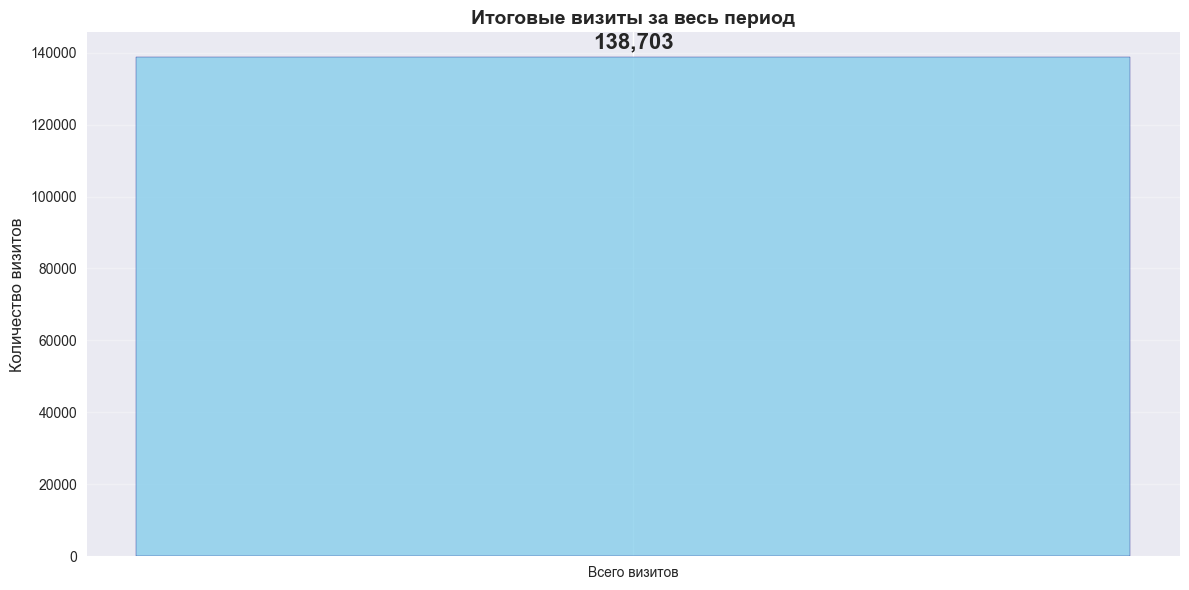

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/total_visits.png


In [27]:
# График 1: Итоговые визиты
print("Создание графика: Итоговые визиты...")

plt.figure(figsize=(12, 6))
total_visits = conversion_df['visits'].sum()

plt.bar(['Всего визитов'], [total_visits], color='skyblue', alpha=0.8, edgecolor='navy')
plt.ylabel('Количество визитов', fontsize=12)
plt.title('Итоговые визиты за весь период', fontsize=14, fontweight='bold')

# Добавляем значение на столбец
plt.text(0, total_visits + total_visits * 0.01, f'{total_visits:,}', 
         ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/total_visits.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/total_visits.png")

Создание графика: Итоговые визиты с разбивкой по платформам...


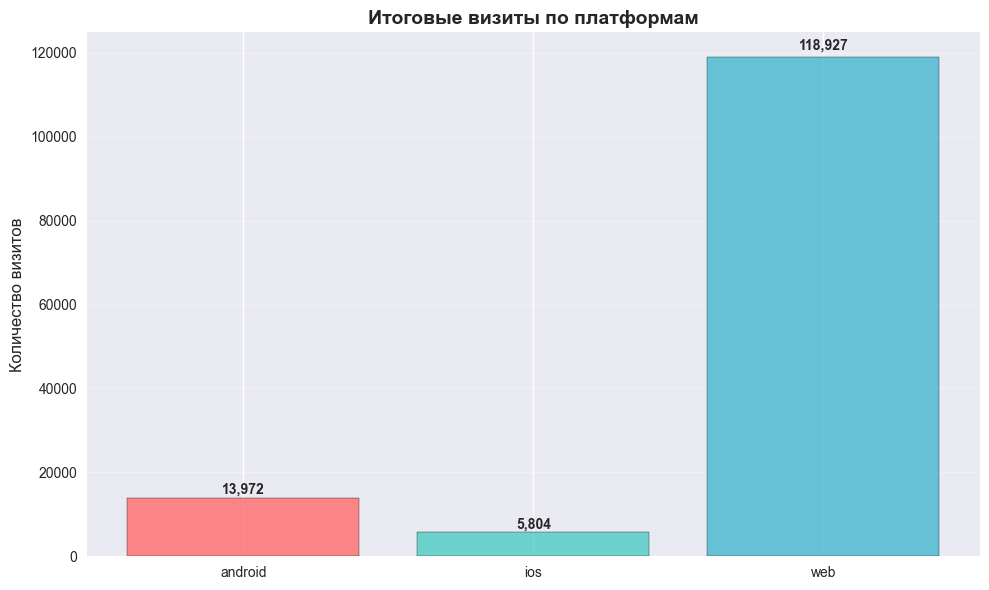

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/visits_by_platform.png


In [28]:
# График 2: Итоговые визиты с разбивкой по платформам
print("Создание графика: Итоговые визиты с разбивкой по платформам...")

plt.figure(figsize=(10, 6))
platforms = platform_summary['platform']
visits = platform_summary['visits']

bars = plt.bar(platforms, visits, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')

plt.ylabel('Количество визитов', fontsize=12)
plt.title('Итоговые визиты по платформам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, visit in zip(bars, visits):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + visit * 0.01, 
             f'{visit:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/visits_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/visits_by_platform.png")

Создание графика: Итоговые регистрации...


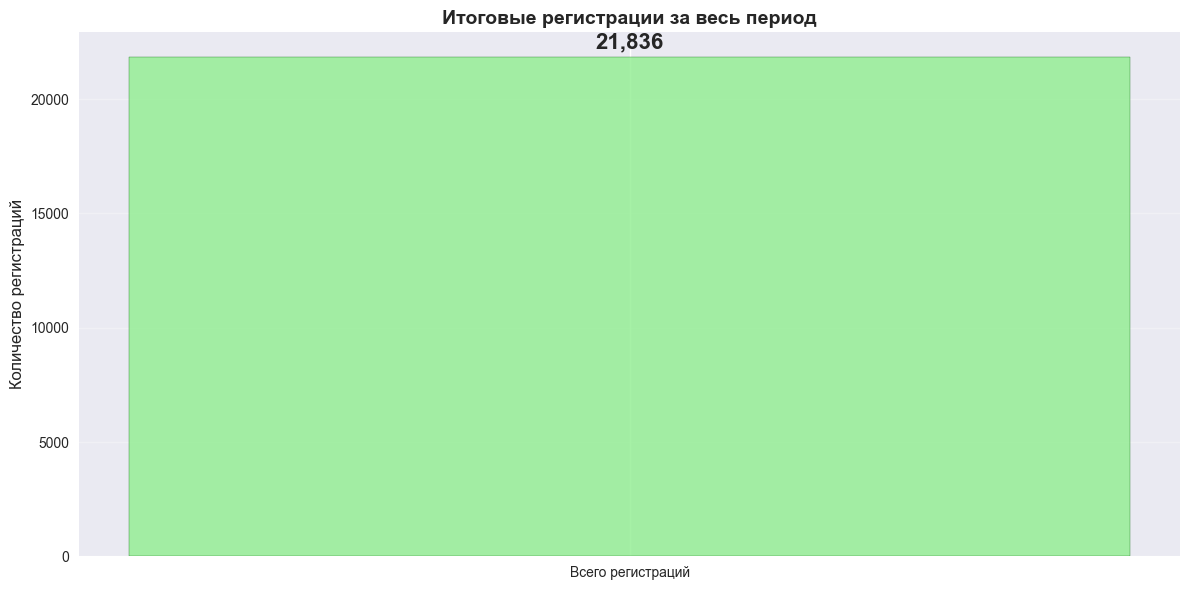

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/total_registrations.png


In [29]:
# График 3: Итоговые регистрации
print("Создание графика: Итоговые регистрации...")

plt.figure(figsize=(12, 6))
total_registrations = conversion_df['registrations'].sum()

plt.bar(['Всего регистраций'], [total_registrations], color='lightgreen', alpha=0.8, edgecolor='darkgreen')
plt.ylabel('Количество регистраций', fontsize=12)
plt.title('Итоговые регистрации за весь период', fontsize=14, fontweight='bold')

# Добавляем значение на столбец
plt.text(0, total_registrations + total_registrations * 0.01, f'{total_registrations:,}', 
         ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/total_registrations.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/total_registrations.png")

Создание графика: Итоговые регистрации с разбивкой по платформе...


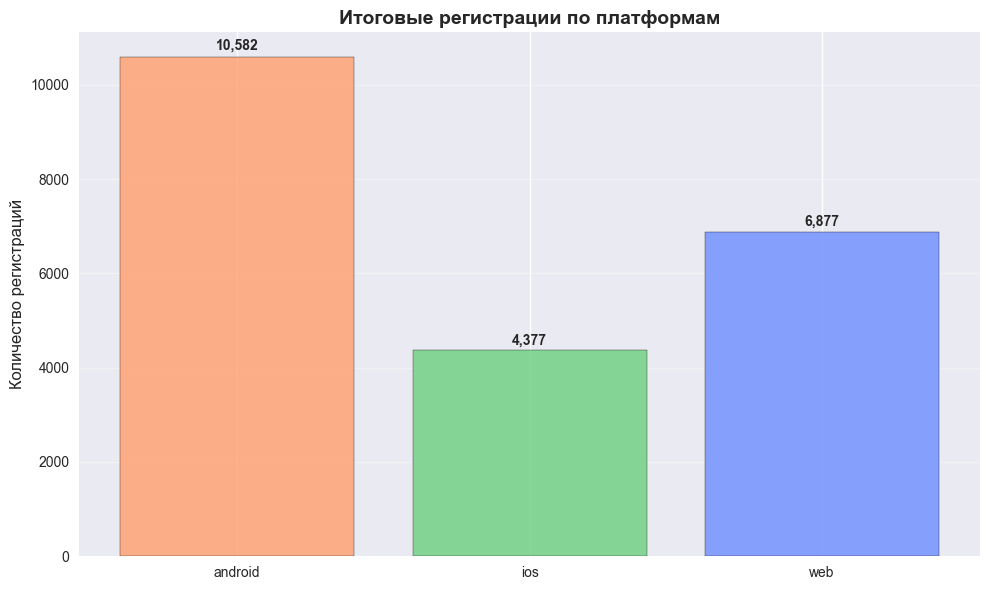

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/registrations_by_platform.png


In [30]:
# График 4: Итоговые регистрации с разбивкой по платформе
print("Создание графика: Итоговые регистрации с разбивкой по платформе...")

plt.figure(figsize=(10, 6))
platforms = platform_summary['platform']
registrations = platform_summary['registrations']

bars = plt.bar(platforms, registrations, color=['#FF9E6D', '#6BCF7F', '#6B8CFF'], alpha=0.8, edgecolor='black')

plt.ylabel('Количество регистраций', fontsize=12)
plt.title('Итоговые регистрации по платформам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, reg in zip(bars, registrations):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + reg * 0.01, 
             f'{reg:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/registrations_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/registrations_by_platform.png")

Создание графика: Конверсия по каждой платформе...


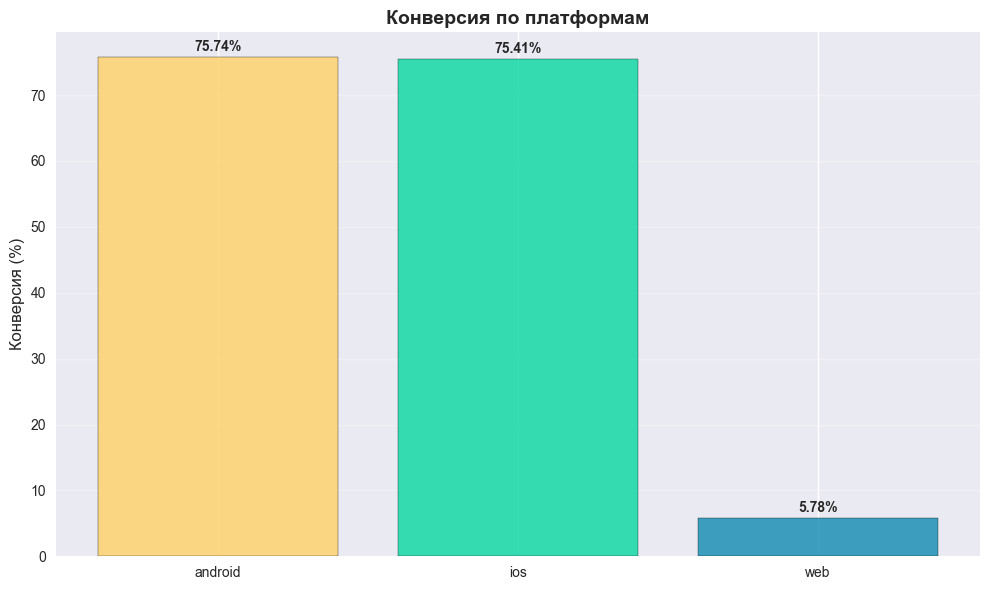

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/conversion_by_platform.png


In [31]:
# График 5: Конверсия по каждой платформе
print("Создание графика: Конверсия по каждой платформе...")

plt.figure(figsize=(10, 6))
platforms = platform_summary['platform']
conversions = platform_summary['conversion']

bars = plt.bar(platforms, conversions, color=['#FFD166', '#06D6A0', '#118AB2'], alpha=0.8, edgecolor='black')

plt.ylabel('Конверсия (%)', fontsize=12)
plt.title('Конверсия по платформам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, conv in zip(bars, conversions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{conv}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/conversion_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/conversion_by_platform.png")

Создание графика: Средняя конверсия...


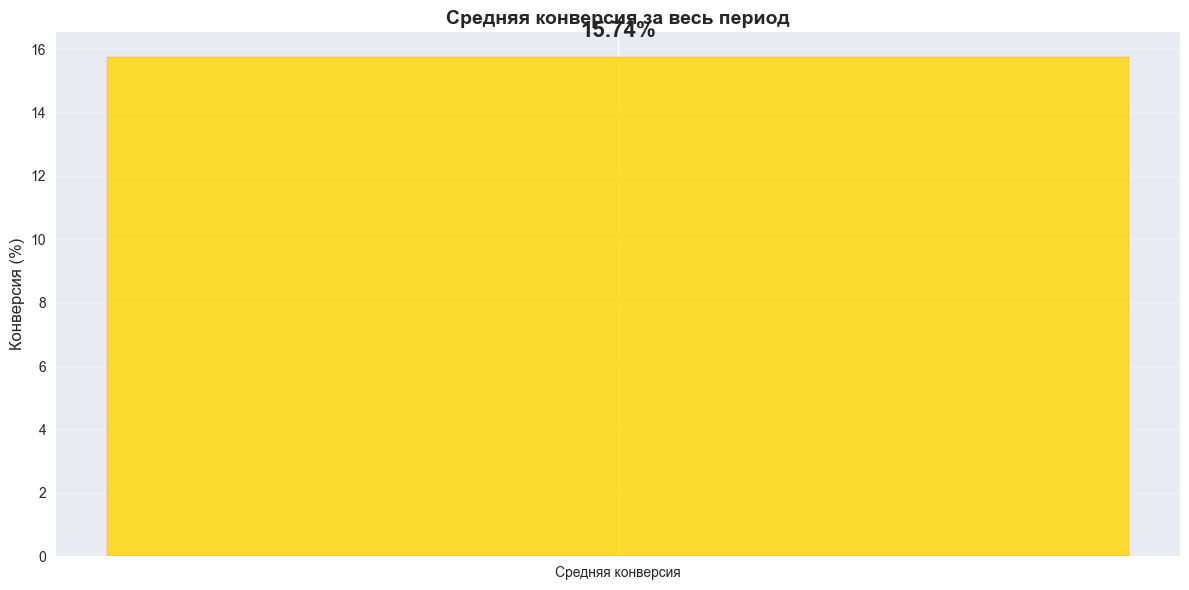

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/average_conversion.png


In [32]:
# График 6: Средняя конверсия
print("Создание графика: Средняя конверсия...")

plt.figure(figsize=(12, 6))
total_conversion = (platform_summary['registrations'].sum() / platform_summary['visits'].sum() * 100).round(2)

plt.bar(['Средняя конверсия'], [total_conversion], color='gold', alpha=0.8, edgecolor='darkorange')
plt.ylabel('Конверсия (%)', fontsize=12)
plt.title('Средняя конверсия за весь период', fontsize=14, fontweight='bold')

# Добавляем значение на столбец
plt.text(0, total_conversion + 0.5, f'{total_conversion}%', 
         ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/average_conversion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/average_conversion.png")

Создание графика: Стоимости рекламы...


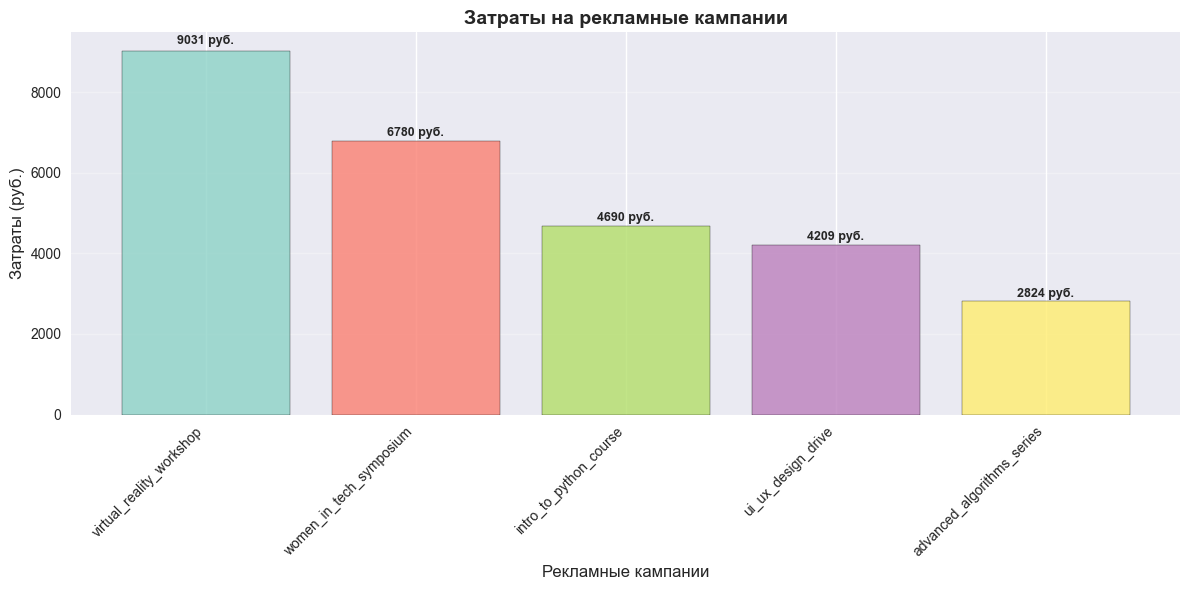

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/advertising_costs.png


In [33]:
# График 7: Стоимости рекламы
print("Создание графика: Стоимости рекламы...")

plt.figure(figsize=(12, 6))

# Фильтруем дни с рекламой
ads_days = final_ads_df[final_ads_df['cost'] > 0]

if not ads_days.empty:
    # Группируем по кампаниям
    campaign_costs = ads_days.groupby('utm_campaign')['cost'].sum().sort_values(ascending=False)
    
    plt.bar(range(len(campaign_costs)), campaign_costs.values, 
            color=plt.cm.Set3(np.linspace(0, 1, len(campaign_costs))),
            alpha=0.8, edgecolor='black')
    
    plt.xlabel('Рекламные кампании', fontsize=12)
    plt.ylabel('Затраты (руб.)', fontsize=12)
    plt.title('Затраты на рекламные кампании', fontsize=14, fontweight='bold')
    
    plt.xticks(range(len(campaign_costs)), campaign_costs.index, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, cost in enumerate(campaign_costs.values):
        plt.text(i, cost + cost * 0.01, f'{cost:.0f} руб.', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Нет данных о рекламных затратах', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/advertising_costs.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/advertising_costs.png")

Создание графика: Визиты с выделением рекламных кампаний...


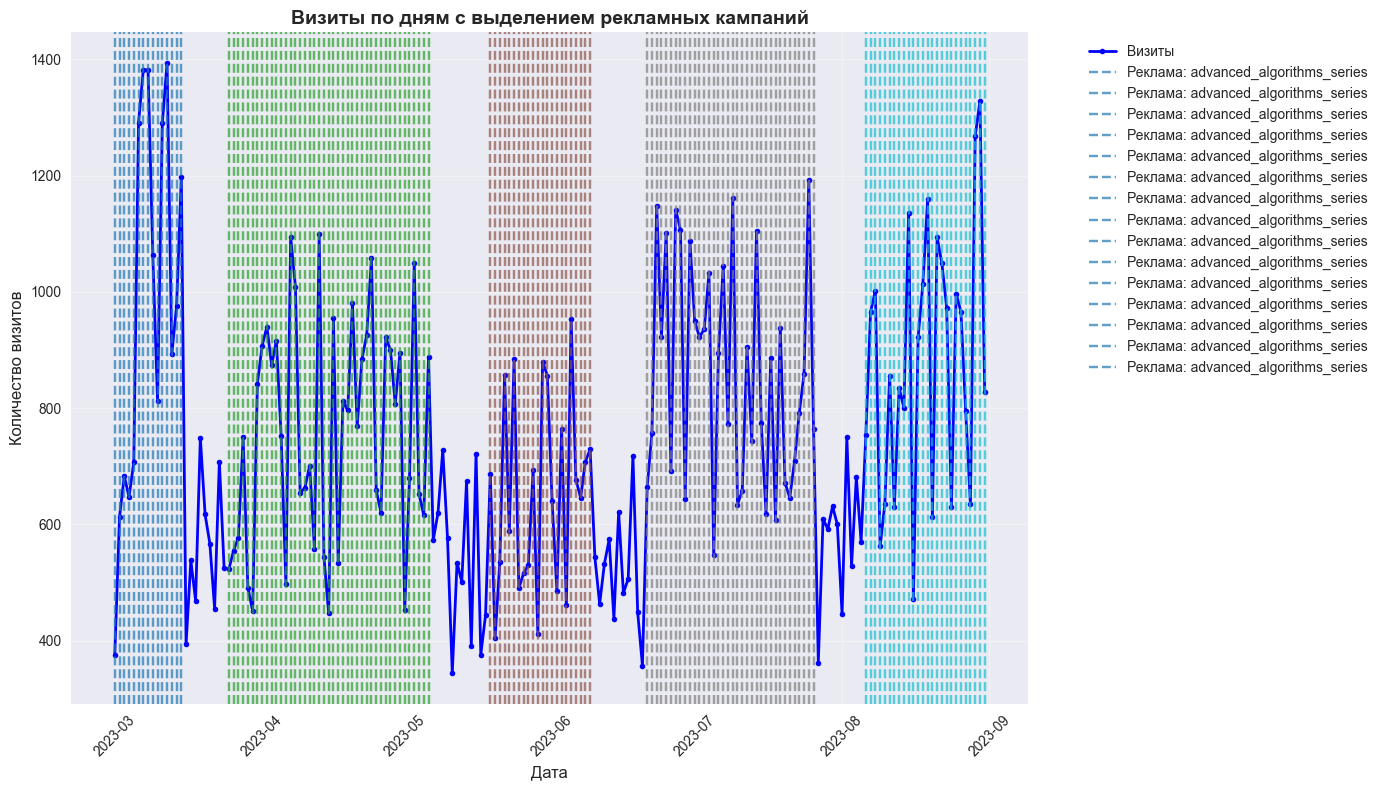

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/visits_with_ad_campaigns.png


In [34]:
# График 8: Визиты за весь период с цветовым выделением рекламной кампании
print("Создание графика: Визиты с выделением рекламных кампаний...")

plt.figure(figsize=(14, 8))

# Создаем цветовую карту для кампаний
campaigns = final_ads_df[final_ads_df['utm_campaign'] != 'none']['utm_campaign'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(campaigns))) if len(campaigns) > 0 else ['gray']

# Основной график визитов
plt.plot(final_ads_df['date_group'], final_ads_df['visits'], 
         label='Визиты', linewidth=2, color='blue', marker='o', markersize=4)

# Выделяем дни с рекламой разными цветами
for i, campaign in enumerate(campaigns):
    campaign_days = final_ads_df[final_ads_df['utm_campaign'] == campaign]
    if not campaign_days.empty:
        color = colors[i % len(colors)]
        for _, day in campaign_days.iterrows():
            plt.axvline(x=day['date_group'], color=color, linestyle='--', alpha=0.7, 
                       label=f'Реклама: {campaign}' if i == 0 else "")

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество визитов', fontsize=12)
plt.title('Визиты по дням с выделением рекламных кампаний', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/visits_with_ad_campaigns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/visits_with_ad_campaigns.png")

Создание графика: Регистрации с выделением рекламных кампаний...


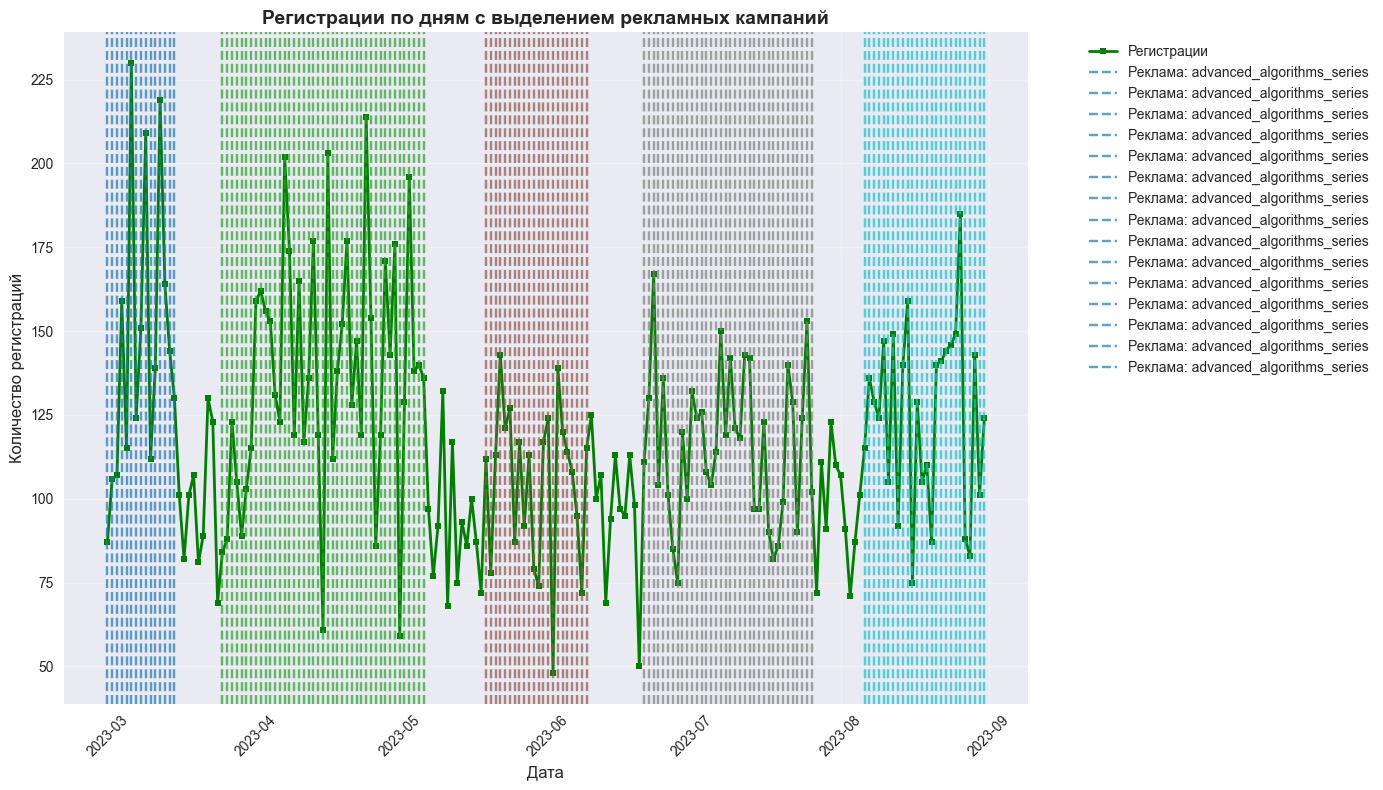

График сохранен: C:\Users\Rebel\PycharmProjects\scientificProject\charts/registrations_with_ad_campaigns.png


In [35]:
# График 9: Регистрации за весь период с цветовым выделением рекламной кампании
print("Создание графика: Регистрации с выделением рекламных кампаний...")

plt.figure(figsize=(14, 8))

# Основной график регистраций
plt.plot(final_ads_df['date_group'], final_ads_df['registrations'], 
         label='Регистрации', linewidth=2, color='green', marker='s', markersize=4)

# Выделяем дни с рекламой разными цветами
for i, campaign in enumerate(campaigns):
    campaign_days = final_ads_df[final_ads_df['utm_campaign'] == campaign]
    if not campaign_days.empty:
        color = colors[i % len(colors)]
        for _, day in campaign_days.iterrows():
            plt.axvline(x=day['date_group'], color=color, linestyle='--', alpha=0.7, 
                       label=f'Реклама: {campaign}' if i == 0 else "")

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество регистраций', fontsize=12)
plt.title('Регистрации по дням с выделением рекламных кампаний', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()

# Сохраняем график
plt.savefig(f'{charts_dir}/registrations_with_ad_campaigns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"График сохранен: {charts_dir}/registrations_with_ad_campaigns.png")

In [36]:
# Проверяем все созданные файлы
print("="*50)
print("ПРОВЕРКА СОЗДАННЫХ ГРАФИКОВ")
print("="*50)

created_files = []
for filename in os.listdir(charts_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(charts_dir, filename)
        file_size = os.path.getsize(filepath)
        created_files.append((filename, file_size))
        print(f"✓ {filename} ({file_size} bytes)")

print(f"\nВсего создано графиков: {len(created_files)}")

# Выводим список требуемых графиков
required_charts = [
    "total_visits.png",
    "visits_by_platform.png", 
    "total_registrations.png",
    "registrations_by_platform.png",
    "conversion_by_platform.png",
    "average_conversion.png",
    "advertising_costs.png",
    "visits_with_ad_campaigns.png",
    "registrations_with_ad_campaigns.png"
]

print("\nТребуемые графики:")
for chart in required_charts:
    status = "✓ СОЗДАН" if chart in [f[0] for f in created_files] else "✗ ОТСУТСТВУЕТ"
    print(f"  {status} {chart}")

print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ ЗАВЕРШЕНА!")
print("="*50)

ПРОВЕРКА СОЗДАННЫХ ГРАФИКОВ
✓ advertising_costs.png (194800 bytes)
✓ average_conversion.png (79345 bytes)
✓ conversion_by_platform.png (79946 bytes)
✓ registrations_by_platform.png (90145 bytes)
✓ registrations_with_ad_campaigns.png (743333 bytes)
✓ total_registrations.png (88262 bytes)
✓ total_visits.png (98546 bytes)
✓ visits_by_platform.png (94242 bytes)
✓ visits_with_ad_campaigns.png (785721 bytes)

Всего создано графиков: 9

Требуемые графики:
  ✓ СОЗДАН total_visits.png
  ✓ СОЗДАН visits_by_platform.png
  ✓ СОЗДАН total_registrations.png
  ✓ СОЗДАН registrations_by_platform.png
  ✓ СОЗДАН conversion_by_platform.png
  ✓ СОЗДАН average_conversion.png
  ✓ СОЗДАН advertising_costs.png
  ✓ СОЗДАН visits_with_ad_campaigns.png
  ✓ СОЗДАН registrations_with_ad_campaigns.png

ВИЗУАЛИЗАЦИЯ ДАННЫХ ЗАВЕРШЕНА!
